In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import pickle
from scipy.misc import imsave
%matplotlib inline

In [2]:
#GETTING THE CORRECTION COEFFICIENTS FROM CAMERA CALIBATION#
calibration_data = pickle.load(open("calibration_data.p", "rb" ))
matrix = calibration_data['camera_matrix']
dist_coef = calibration_data['distortion_coefficient']

In [3]:
#READING THE IMAGES#
img1= plt.imread("test_images/straight_lines1.jpg")
img2 =plt.imread("test_images/straight_lines2.jpg")
spl=plt.imread("test_images/special_test1.jpg")
images=[img1,img2,spl]

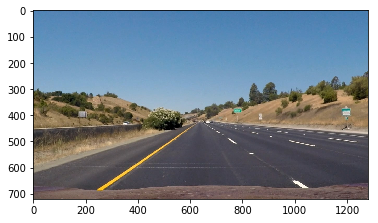

In [4]:
#VISUALISING THE IMAGE#
plt.imshow(img1)

In [5]:
source_points = np.float32([(580, 460), (205, 720), (1110, 720), (703, 460)])#THE ORIGINAL 4 POINTS#
dest_points = np.float32([(320, 0), (320, 720), (960, 720), (960, 0)])#THE POSITION THEY SHOULD BE IN #

In [6]:
#GETTING THE PERSPECTIVE TRANSFORM#
warp_matrix = cv2.getPerspectiveTransform(source_points,dest_points)

In [8]:
#UNDISTORTING THE IMAGE#
undistorted_images=[]
for image in images:
    undistorted_images.append(cv2.undistort(image,matrix,dist_coef, None, matrix))

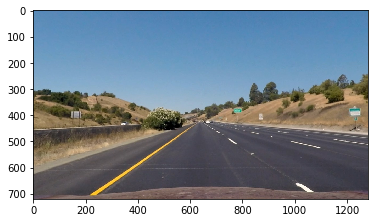

In [9]:
#VISUALISING THE UNDISTORTED IMAGE#
plt.imshow(undistorted_images[0])

In [10]:
#WARPING THE IMAGE#
warped_images=[]
for image in images:
    warped_images.append(cv2.warpPerspective(image, warp_matrix, (img1.shape[1],img1.shape[0]), flags = cv2.INTER_LINEAR))

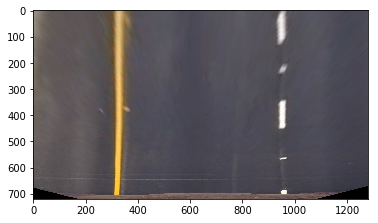

In [11]:
#BIRDS EYE VIEW#
plt.imshow(warped_images[0])

In [37]:
#SAVING THE IMAGE FOR FUTURE USE#
c=1
for image in warped_images:
    path =  "output_images/" + "lane" +str(c)+ ".jpg"
    imsave(path, cv2.cvtColor(image,cv2.COLOR_RGBA2RGB))
    c=c+1

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  """


In [20]:
###ONE FUNCTION FOR ALL STEPS###
def birdeye(img,warp_matrix,matix,dist_coef):
    undistorted_image=cv2.undistort(img,matrix,dist_coef, None, matrix)
    warped_image=cv2.warpPerspective(img, warp_matrix, (img.shape[1],img.shape[0]), flags = cv2.INTER_LINEAR)
    return warped_image
    
    

In [7]:
warp_matrix

array([[-5.07719534e-01, -1.49581986e+00,  9.51329713e+02],
       [-4.09682298e-16, -1.98816135e+00,  9.14554220e+02],
       [-3.21723274e-19, -2.38603771e-03,  1.00000000e+00]])